<a href="https://colab.research.google.com/github/shashanks33/ML-Prac/blob/master/Wine-Prediction/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras

In [0]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

white = white.reindex(np.random.permutation(white.index))
red = red.reindex(np.random.permutation(red.index))

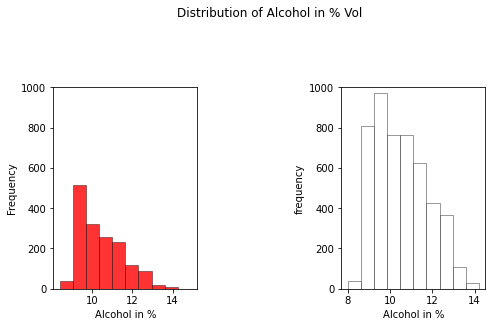

In [0]:
# plot a histogram to show % of alcohol in both wines
fig, ax = plt.subplots(1,2)
ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.8, label='Red wine', ec='black', lw=0.5)
ax[1].hist(white.alcohol, 10, facecolor='white', alpha=0.8, label='White wine', ec='black', lw=0.5)
fig.subplots_adjust(left = 0, right = 1, bottom = 0,  
               top = 0.7, hspace = 0.2, wspace = 1)

ax[0].set_ylim([0,1000])
ax[0].set_xlabel('Alcohol in %')
ax[0].set_ylabel('Frequency')
ax[1].set_ylim([0,1000])
ax[1].set_xlabel('Alcohol in %')
ax[1].set_ylabel('frequency')
fig.suptitle("Distribution of Alcohol in % Vol") 
plt.show()

In [0]:
# adding new cols to both datasets
red['type'] = 1
white['type'] = 0

both = red.append(white, ignore_index=True)
both = both.reindex(np.random.permutation(both.index))
# x = both.iloc[:, 0:11]
# y = np.ravel(both.type)
# print(both.type)
# print(both)
# print(x)
# print(y)

# splitting into train, test, validate
# x_train, x_test, y_train, y_test = train_test_split( 
          #  x, y, test_size = 0.34, random_state = 45)
          
# frac=1 instructs sample() function to return all (100% or fraction = 1.0) rows
train, validate, test = np.split(both.sample(frac=1), [int(.6*len(both)), int(.8*len(both))])

In [0]:
# splitting each datasets into the features and labels
# x_train = train.iloc[:, 0:11]
x_train = train.drop('quality', axis=1)
x_train_scaled = preprocessing.scale(x_train)
# y_train = train['quality']
y_train = train.quality

# x_validate = validate.iloc[:, 0:11]
x_validate = validate.drop('quality', axis=1)
x_validate_scaled = preprocessing.scale(x_validate)
# y_validate = validate['quality']
y_validate = validate.quality

# x_test = test.iloc[:, 0:11]
x_test = test.drop('quality', axis=1)
x_test_scaled = preprocessing.scale(x_test)
# y_test = test['quality']
y_test = test.quality
# both['quality'].unique()

In [0]:
# Build model

model = keras.models.Sequential() # Initialize constructor
model.add(keras.layers.Flatten(input_shape=(12,))) # Input layer
model.add(keras.layers.Dense(30, activation='relu')) # Hidden layer 1
# model.add(keras.layers.Dense(32, activation='relu')) # Hidden layer 2
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax')) # Output layer

# model = keras.models.Sequential()
# model.add(keras.layers.Dense(12, activation ='relu', input_shape =(11, ))) 
# model.add(keras.layers.Dense(9, activation ='relu')) 
# model.add(keras.layers.Dense(1, activation ='sigmoid')) 

# model.summary()
# model.get_config()
model.compile(optimizer=keras.optimizers.Adagrad(learning_rate=0.06),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [0]:
# Train model

model.fit(x_train_scaled, y_train, epochs=10, batch_size=5, verbose=1)

Epoch 1/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7205 - accuracy: 0.5169
Epoch 2/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7197 - accuracy: 0.5180
Epoch 3/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7191 - accuracy: 0.5162
Epoch 4/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7185 - accuracy: 0.5185
Epoch 5/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7177 - accuracy: 0.5185
Epoch 6/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7176 - accuracy: 0.5208
Epoch 7/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7167 - accuracy: 0.5187
Epoch 8/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7155 - accuracy: 0.5221
Epoch 9/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7149 - accuracy: 0.5228
Epoch 10/10
780/780 [==============================] - 1s 1ms/step - loss: 1.7141 - accuracy: 0.5228

In [0]:
# Evaluate validation dataset

valid_loss, valid_acc = model.evaluate(x_validate, y_validate)
print("Validation loss {}", valid_loss, "Validation accuracy {}", valid_acc*100)

41/41 [==============================] - 0s 1ms/step - loss: 2.4611 - accuracy: 0.0000e+00
Validation loss {} 2.4611058235168457 Validation accuracy {} 0.0
